<a href="https://colab.research.google.com/github/leopapuma/tarea-2-de-investigacion-de-operaciones-/blob/main/tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

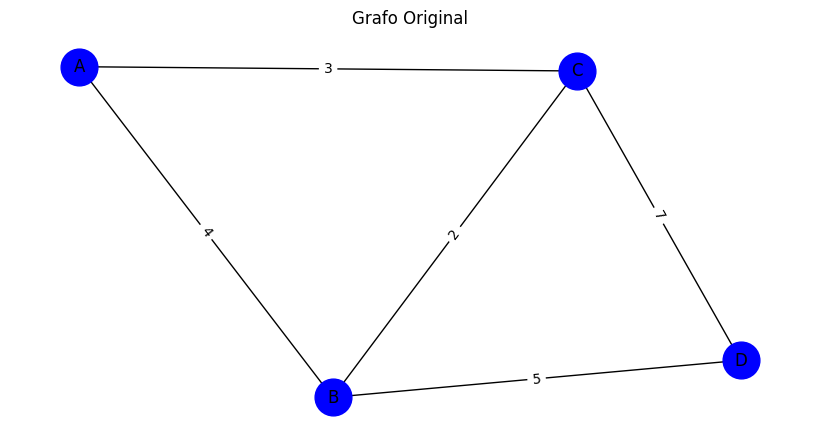

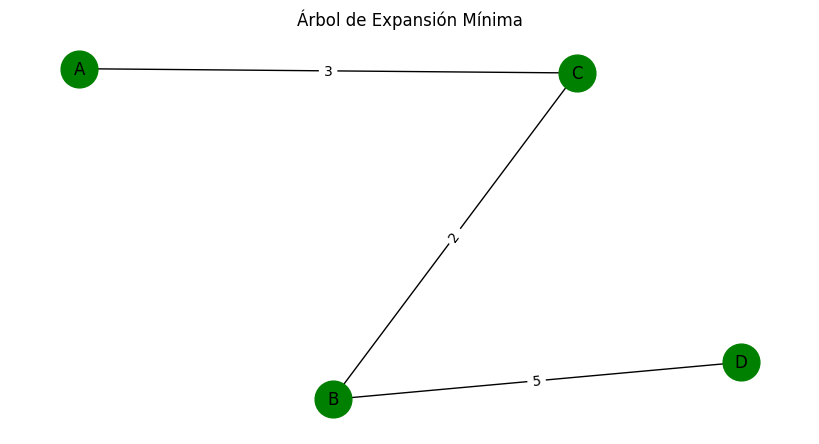

In [19]:
# usuamos las siguientes librerias usaremos matplotlib para graficar el grafo orginal y el resultado
import networkx as nx
import matplotlib.pyplot as plt

# creamos el grafo, como ejemplo usaremos loa siguientes puntos
G = nx.Graph()
edges = [
    ('A', 'B', 4), # a va a b con 4 unidades
    ('A', 'C', 3), # a a c con 3 unidades
    ('B', 'C', 2),  # b a c con 2 unidades
    ('B', 'D', 5), #b a d con 5 unidades
    ('C', 'D', 7)  # c a d con 7 unidades
]
G.add_weighted_edges_from(edges)

# calcularemos el arbol minimo de expansion con kruskal
arbol = nx.minimum_spanning_tree(G, algorithm='kruskal')

# agregamos el grafo que usaremos como ejemplo
grafo = nx.spring_layout(G)
plt.figure(figsize=(8,4))
nx.draw(G, grafo, with_labels=True, node_color='blue', node_size=700)
nx.draw_networkx_edge_labels(G, grafo, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Grafo Original")
plt.show()

# graficacmos el arbol minimo
plt.figure(figsize=(8,4))
nx.draw(arbol, grafo, with_labels=True, node_color='green', node_size=700)
nx.draw_networkx_edge_labels(arbol, grafo, edge_labels=nx.get_edge_attributes(arbol, 'weight'))
plt.title("Árbol de Expansión Mínima")
plt.show()



Ruta más corta de A a D: ['A', 'B', 'C', 'D']
Distancia total recorrida : 6


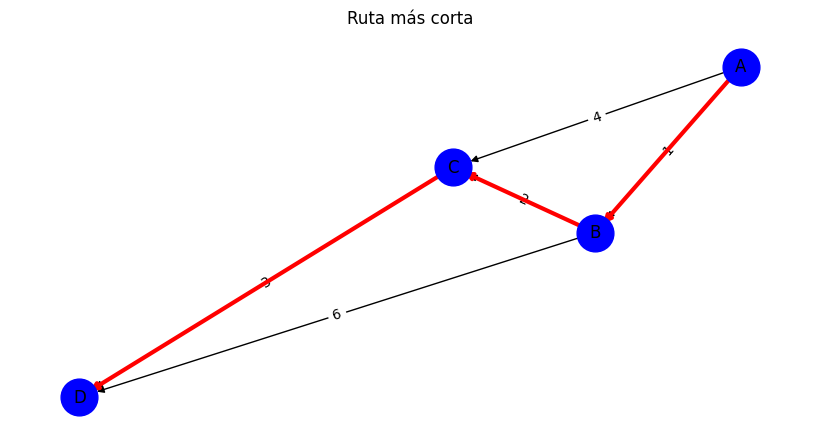

In [21]:
# usaremos las siguientes librerias para hacer la ruta mas corta y graficar los grafos
import networkx as nx
import matplotlib.pyplot as plt

# cremos el grafo, con los siguientes datos
x = nx.DiGraph()
edges = [
    ('A', 'B', 1), # a va b con un valor de 1
    ('A', 'C', 4), # a va c con un valor de 4
    ('B', 'C', 2), # b va c con un valor de 2
    ('B', 'D', 6), # b va d con un valor de 6
    ('C', 'D', 3)  # c va d con un valor de 3
]
x.add_weighted_edges_from(edges)

# con las siguientes lineas de codigo crearemos la ruta mas corta usuando dijkstra
ruta = nx.dijkstra_path(x, source='A', target='D', weight='weight')
distancia = nx.dijkstra_path_length(x, source='A', target='D', weight='weight')

print(f"Ruta más corta de A a D: {ruta}") # imprimira la ruta mas corta
print(f"Distancia total recorrida : {distancia}") # aqui dara la distancia recorrida por esa ruta

# dibujamos el grafo con los puntos de arriba
grafo = nx.spring_layout(x)
plt.figure(figsize=(8,4))
nx.draw(x, grafo, with_labels=True, node_color='blue', node_size=700, arrows=True)
nx.draw_networkx_edge_labels(x, grafo, edge_labels=nx.get_edge_attributes(x, 'weight'))

# aqui resaltaremos al ruta mas corta que va tomar para que se vea en la grafica
path_edges = list(zip(ruta, ruta[1:]))
nx.draw_networkx_edges(x, grafo, edgelist=path_edges, edge_color='red', width=3)

plt.title("Ruta más corta")
plt.show()



Flujo máximo: 13
Distribución del flujo:
S: {'A': 4, 'C': 9}
A: {'B': 4, 'C': 0}
C: {'D': 9}
B: {'T': 4}
D: {'B': 0, 'T': 9}
T: {}


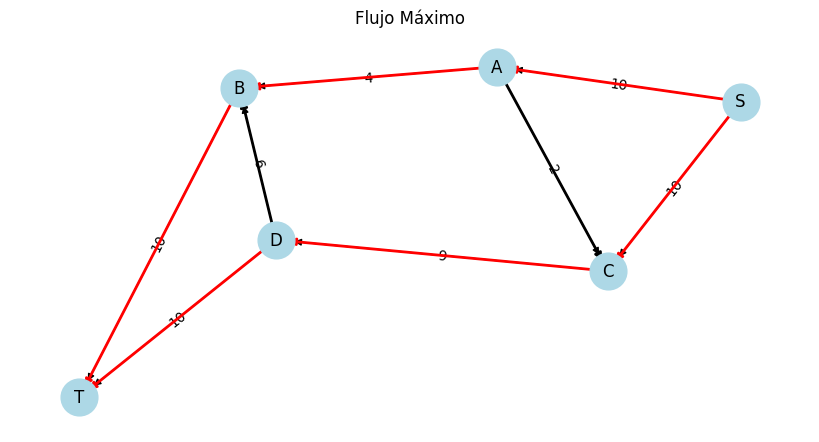

In [18]:
# usaremos las siguientes librerias para construir el codigo y graficar el grafo y su resultado
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo con los siguientes puntos
x = nx.DiGraph()
edges = [
    ('S', 'A', 10),# s va a con 10 unidades
    ('S', 'C', 10), # s va c con 10 unidades
    ('A', 'B', 4), # a  va b con 4 unidades
    ('A', 'C', 2), # a va c con 2 unidades
    ('C', 'D', 9), # c va d con 9 unidades
    ('B', 'T', 10), # b va t con 10 unidades
    ('D', 'B', 6), #d va b con 6 unidades
    ('D', 'T', 10) # d va con t con 10 unidades
]
for u, v, i in edges:
    x.add_edge(u, v, capacity=i)

# las lineas de codigo que estan abajo servira para calcular el flujo maximo del grafo desde s hasta t
valor, direccion = nx.maximum_flow(x, 'S', 'T', flow_func=nx.algorithms.flow.edmonds_karp)
print(f"Flujo máximo: {valor}") # imprimimos el flujo maximo
print("Distribución del flujo:")
for u in direccion:
    print(f"{u}: {direccion[u]}")

# Dibujamos el grafo con sus capacidades de cada uno
pos = nx.spring_layout(x)
plt.figure(figsize=(8,4))
nx.draw(x, pos, with_labels=True, node_color='lightblue', node_size=700, arrows=True)
nx.draw_networkx_edge_labels(x, pos, edge_labels={(u,v): f"{d['capacity']}" for u,v,d in x.edges(data=True)})

# resaltamos el flujo maximo en la direccion que va tomar
edge_colors = []
for u, v in x.edges():
    if direccion[u].get(v, 0) > 0:
        edge_colors.append('red')
    else:
        edge_colors.append('black')

nx.draw_networkx_edges(x, pos, edge_color=edge_colors, width=2)
plt.title("Flujo Máximo")
plt.show()

